# Import thu vien #

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model, Input
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.vis_utils import plot_model

# Doc hinh anh #

In [ ]:
IMG_SIZE = 227
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

train_set = image_dataset_from_directory(
    "drive/My Drive/Chest-X-ray/dataset/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

dev_set = image_dataset_from_directory(
    "drive/My Drive/Chest-X-ray/dataset/val/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

test_set = image_dataset_from_directory(
    "drive/My Drive/Chest-X-ray/dataset/test/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


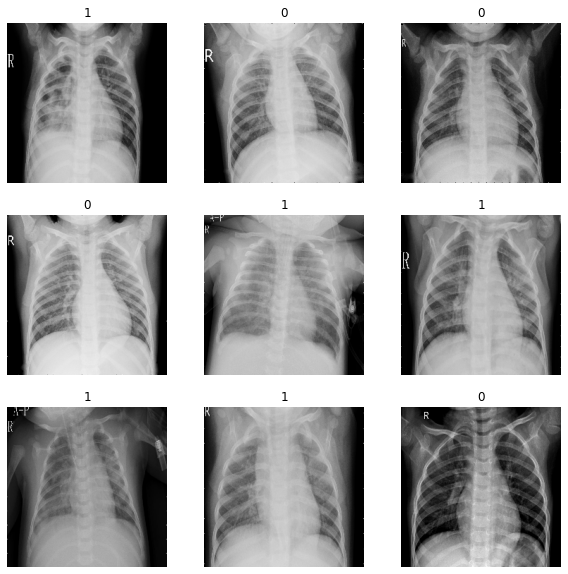

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dev_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

# Xu ly Model #

## Mo hinh tu xay dung ##   
- Le Net -5 
- Alex NET

In [ ]:
# Le-Net
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL)))
model1.add(MaxPooling2D(strides=2))
model1.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model1.add(MaxPooling2D(strides=2))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(84, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model1.summary()

model1.fit(train_set, epochs = 10, validation_data = dev_set)
model1.save('drive/My Drive/Chest-X-ray/model/model1.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 48)      38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 139968)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               35832064  
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [ ]:
# Alex NET
model2 = Sequential()
model2.add(Conv2D(filters=96, input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model2.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model2.fit(train_set, epochs = 10, validation_data = dev_set)
model2.save('drive/My Drive/Chest-X-ray/model/model2.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)      

## Mo hinh hoc chuyen tiep (Transfer learning) ## 
- VGG 16
- ResNet 50 

In [ ]:
# VGG 16 pre-trained
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL))

# breeze all VGG previous layers
for layer in vgg.layers:
	layer.trainable = False

flat = Flatten()(vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(fc1)

model3 = Model(inputs=vgg.inputs, outputs=output)
model3.summary()

model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model3.fit(train_set, epochs = 10, validation_data = dev_set)
model3.save('drive/My Drive/Chest-X-ray/model/model3.h5')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# ResNET 50 pre-trained
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL))

# breeze all ResNet previous layers
for layer in resnet.layers:
	layer.trainable = False

flat = Flatten()(resnet.layers[-1].output)
fc1 = Dense(1024, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(fc1)

model4 = Model(inputs=resnet.inputs, outputs=output)
model4.summary()

model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model4.fit(train_set, epochs = 10, validation_data = dev_set)
model4.save('drive/My Drive/Chest-X-ray/model/model4.h5')

94773248/94765736 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 233, 233, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 114, 114, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 114, 114, 64) 256         conv1_conv[0][0]                 
______________________

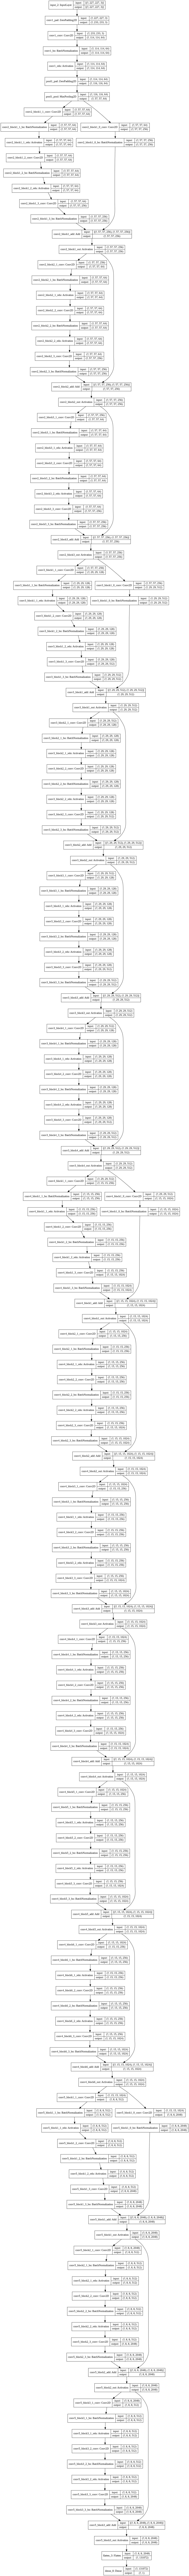

In [ ]:
plot_model(model1, to_file='LeNet.png', show_shapes=True, show_layer_names=True)
plot_model(model2, to_file='AlexNet.png', show_shapes=True, show_layer_names=True)
plot_model(model3, to_file='VGG.png', show_shapes=True, show_layer_names=True)
plot_model(model4, to_file='ResNet.png', show_shapes=True, show_layer_names=True)

# Danh gia mo hinh #  
Cac metrics danh gia   
1. Do chinh xac (Accuracy)
2. Do do precision  
3. Do do recall  
4. Confusion matrix  

---LeNET----
Accuracy: 0.78125
Precision: 0.76131756829433
Recall: 0.948749105426737
---AlexNET----
Accuracy: 0.675
Precision: 0.6657291526887608
Recall: 0.9587106950067474
---VGG----
Accuracy: 0.8109375
Precision: 0.7684145171004241
Recall: 1.0
---ResNET----
Accuracy: 0.796875
Precision: 0.7574126799542842
Recall: 0.9960000000000001


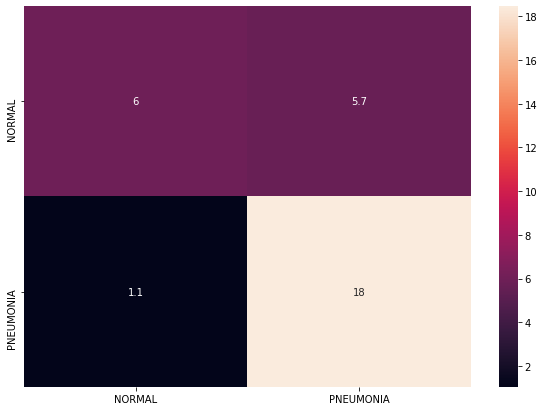

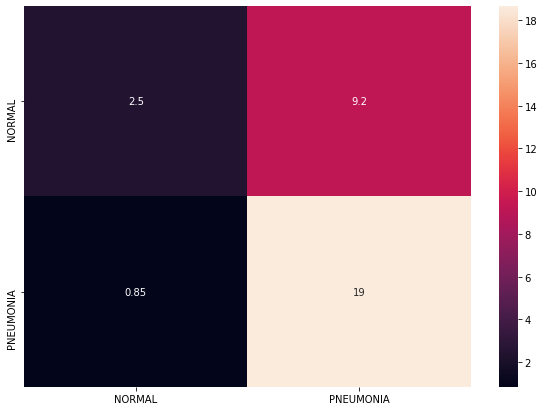

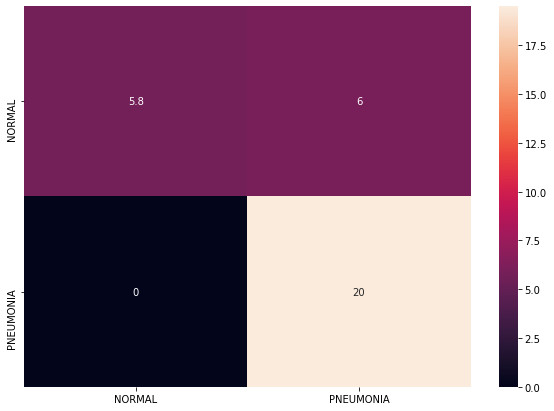

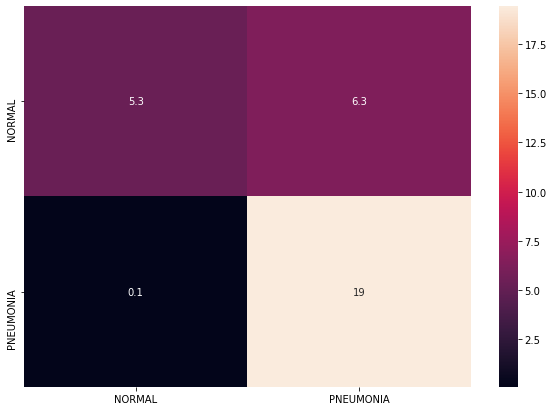

In [ ]:
# Evaluation results 

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sn
import pandas as pd

def eval_model(model):
    acc = []
    precision = []
    recall = []
    cf = []

    for img, label in test_set:
        y_pred = model.predict(img)
        # y_pred = np.argmax(y_pred, axis=-1)
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        # print(y_pred)
        # raise Exception
        acc.append(accuracy_score(label, y_pred))
        precision.append(precision_score(label, y_pred))
        recall.append(recall_score(label, y_pred))
        cf.append(confusion_matrix(label, y_pred))

    print("Accuracy: " + str(np.mean(acc)))
    print("Precision: " + str(np.mean(precision)))
    print("Recall: " + str(np.mean(recall)))


    conf_matrix = np.mean(cf, axis=0)

    df_cm = pd.DataFrame(conf_matrix, index = ["NORMAL","PNEUMONIA"],
                    columns = ["NORMAL","PNEUMONIA"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

print("---LeNET----")
eval_model(model1)
print("---AlexNET----")
eval_model(model2)
print("---VGG----")
eval_model(model3)
print("---ResNET----")
eval_model(model4)